In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving Dim_Vols.csv to Dim_Vols.csv


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [6]:
df = pd.read_csv('Dim_Vols.csv', encoding='ISO-8859-1')

In [7]:
print(df.columns)

Index(['Flight_PK', 'Airline', 'DepartAirport', 'ArriveAirport', 'DepartHour',
       'ArriveHour', 'Matricule_Vol', 'Agence'],
      dtype='object')


In [8]:
# Convertir les colonnes 'DepartHour' et 'ArriveHour' en format datetime
df['DepartHour'] = pd.to_datetime(df['DepartHour'], format='%H:%M')
df['ArriveHour'] = pd.to_datetime(df['ArriveHour'], format='%H:%M')

In [9]:
# Convertir les colonnes 'DepartHour' et 'ArriveHour' en format datetime
df['DepartHour'] = pd.to_datetime(df['DepartHour'], format='%H:%M')
df['ArriveHour'] = pd.to_datetime(df['ArriveHour'], format='%H:%M')

In [16]:
# Si les vols durent moins de 24h, on peut faire :
df['FlightDuration'] = (df['ArriveHour'] - df['DepartHour']).dt.total_seconds() / 3600

In [17]:

# Vérifier les résultats
print(df[['DepartHour', 'ArriveHour', 'FlightDuration']].head())

           DepartHour          ArriveHour  FlightDuration
0 1900-01-01 07:00:00 1900-01-01 10:35:00        3.583333
1 1900-01-01 06:20:00 1900-01-01 09:45:00        3.416667
2 1900-01-01 07:50:00 1900-01-01 11:15:00        3.416667
3 1900-01-01 14:30:00 1900-01-01 18:05:00        3.583333
4 1900-01-01 17:30:00 1900-01-01 20:50:00        3.333333


In [18]:
print(df.columns.tolist())


['Flight_PK', 'Airline', 'DepartAirport', 'ArriveAirport', 'DepartHour', 'ArriveHour', 'Matricule_Vol', 'Agence', 'FlightDuration']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
# Sélection des variables pertinentes pour la régression
X = df[['DepartHour', 'Airline', 'DepartAirport', 'ArriveAirport']]  # Ajoute les caractéristiques souhaitées
y = df['FlightDuration']

In [20]:
# Sélection des variables pertinentes pour la régression
X = df[['DepartHour', 'Airline', 'DepartAirport', 'ArriveAirport']]  # Ajoute les caractéristiques souhaitées
y = df['FlightDuration']

In [21]:
# Convertir les variables catégorielles en variables numériques (par exemple, avec des dummies)
X = pd.get_dummies(X, drop_first=True)


In [22]:
# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Convertir DepartHour et ArriveHour en valeurs numériques (nombre d'heures depuis minuit)
df['DepartHour'] = pd.to_datetime(df['DepartHour']).dt.hour + pd.to_datetime(df['DepartHour']).dt.minute / 60
df['ArriveHour'] = pd.to_datetime(df['ArriveHour']).dt.hour + pd.to_datetime(df['ArriveHour']).dt.minute / 60


In [24]:
# Refaire la séparation des variables X et y
X = df[['DepartHour', 'Airline', 'DepartAirport', 'ArriveAirport']]  # Ajoute les caractéristiques souhaitées
y = df['FlightDuration']

In [25]:
# Convertir les variables catégorielles en variables numériques (par exemple, avec des dummies)
X = pd.get_dummies(X, drop_first=True)


In [26]:
# Séparer les données en jeu d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Créer et entraîner le modèle de régression linéaire
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Faire des prédictions
y_pred = model.predict(X_test)


In [29]:
# Évaluer la performance du modèle
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 27.803932163723033


Le modèle a en moyenne une erreur de prédiction d’environ 5.27 heures sur les durées de vol.


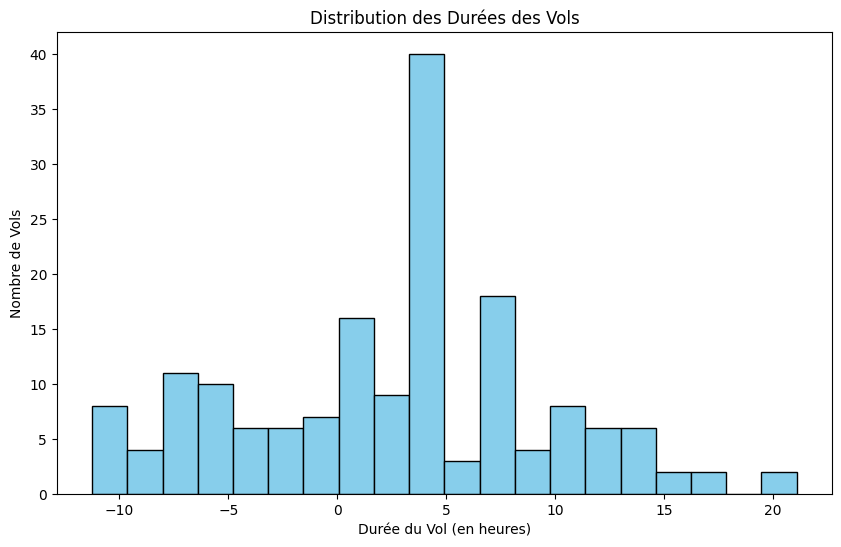

In [30]:
import matplotlib.pyplot as plt

# Graphique de la durée des vols
plt.figure(figsize=(10,6))
plt.hist(df['FlightDuration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des Durées des Vols')
plt.xlabel('Durée du Vol (en heures)')
plt.ylabel('Nombre de Vols')
plt.show()


In [31]:
# ⚠️ Correction : Ajouter 24h si la durée est négative (vols arrivant le jour suivant)
df.loc[df['FlightDuration'] < 0, 'FlightDuration'] += 24

In [32]:
# Affichage des premières lignes pour vérification
print(df[['DepartHour', 'ArriveHour', 'FlightDuration']].head())

   DepartHour  ArriveHour  FlightDuration
0    7.000000   10.583333        3.583333
1    6.333333    9.750000        3.416667
2    7.833333   11.250000        3.416667
3   14.500000   18.083333        3.583333
4   17.500000   20.833333        3.333333


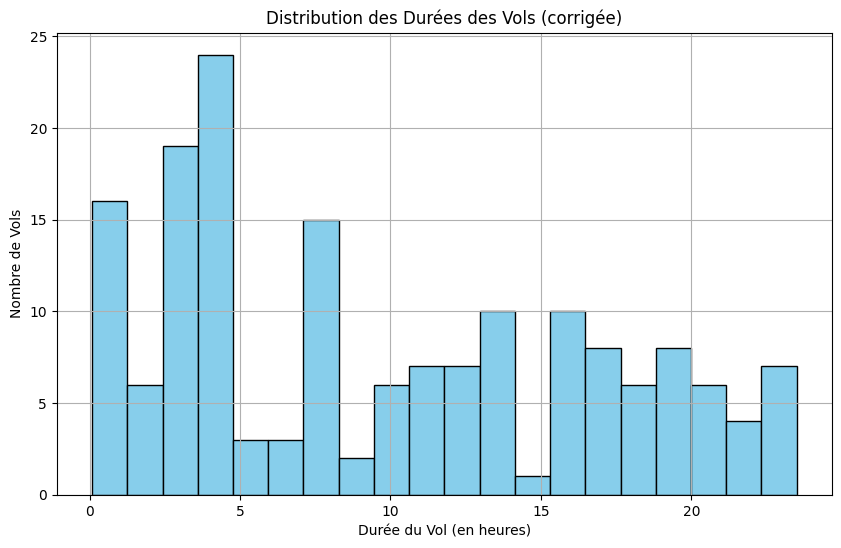

In [33]:
# Histogramme corrigé
plt.figure(figsize=(10, 6))
plt.hist(df['FlightDuration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des Durées des Vols (corrigée)')
plt.xlabel('Durée du Vol (en heures)')
plt.ylabel('Nombre de Vols')
plt.grid(True)
plt.show()

R squared


- La majorité des vols ont une durée inférieure à 5 heures
- Les pics entre 0h et 5h indiquent une concentration notable des vols dans cette plage horaire.
- une dispersion importante des vols ayant des durées allant jusqu’à 24 heures, ce qui indique la présence de vols long-courriers (ex. intercontinentaux ou avec escales longues).
- On observe une asymétrie vers la droite (beaucoup de valeurs faibles, peu de valeurs élevées), ce qui est typique des distributions de durée dans les transports.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [35]:
# Liste des modèles
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


In [36]:
# Évaluation des modèles
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Modèle': name,
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    })

In [37]:
# Affichage des résultats
results_df = pd.DataFrame(results)
print(results_df)

                     Modèle    MAE   RMSE     R²
0         Linear Regression  4.620  5.273  0.515
1             Decision Tree  5.004  6.086  0.353
2             Random Forest  4.623  5.603  0.452
3  Support Vector Regressor  4.903  5.843  0.404


Linear Regression :

Meilleur R² : 0.515 → il explique 51.5% de la variance.

Plus faible RMSE et MAE comparé aux autres.

C’est le meilleur modèle parmi les 4 dans ce cas

Random Forest :

MAE très proche de la régression linéaire (4.623 vs 4.620).

R² plus faible (0.452), donc il explique un peu moins bien les données.

Performant, mais légèrement en dessous de Linear Regression ici.

SVR et Decision Tree :

Erreurs plus élevées.

Moins bon R².

Moins recommandés sur ce dataset.

Le modèle de régression linéaire est actuellement le meilleur

In [38]:
# Supposons que Random Forest donne les meilleurs résultats
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Prédictions sur tout le dataset (ou X_test selon ton besoin)
df['Predicted_Duration'] = best_model.predict(X)

# Exporter les résultats dans un fichier CSV
df_export = df[['DepartHour', 'Airline', 'DepartAirport', 'ArriveAirport', 'FlightDuration', 'Predicted_Duration']]
df_export.to_csv('predictions_duree_vols.csv', index=False)
